In [1]:
import matplotlib.pyplot as plt
import selenium
import undetected_chromedriver as uc
import re
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os                           
import matplotlib as mpl      
import math
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sc
import csv
import seaborn as sns
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException


In [2]:
df = pd.read_csv('ABCD.csv')

In [3]:
display(df)

,name,rating,numberofbik,WatchthisMonth,asian restaurant,italian restaurant,gril restaurant,mediterranean restaurant,chef restaurant,sitting outside,smoke area,sea food,coffe shop,delivery,burger shop,online order,Converted_Kosher,Price_Convert
0,1,8.6,1467,1323,0,0,1,0,0,1,1,0,0,0,0,1,0,1
1,2,8.2,4857,284,0,0,1,0,0,1,0,0,0,1,0,1,1,1
2,3,7.8,495,200,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,4,7.5,746,210,0,1,0,0,0,0,1,0,1,0,0,0,1,1
4,5,7.8,4301,417,1,0,0,0,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,2279,7.1,6,366,0,0,1,0,0,1,1,0,0,1,1,0,1,1
1808,2280,8.7,600,389,0,0,1,0,0,1,1,0,0,1,0,1,1,0
1809,2281,7.4,76,229,0,0,1,0,0,0,0,0,0,1,0,1,1,1
1810,2283,8.3,8,358,0,1,0,0,0,0,0,0,0,0,0,0,0,1


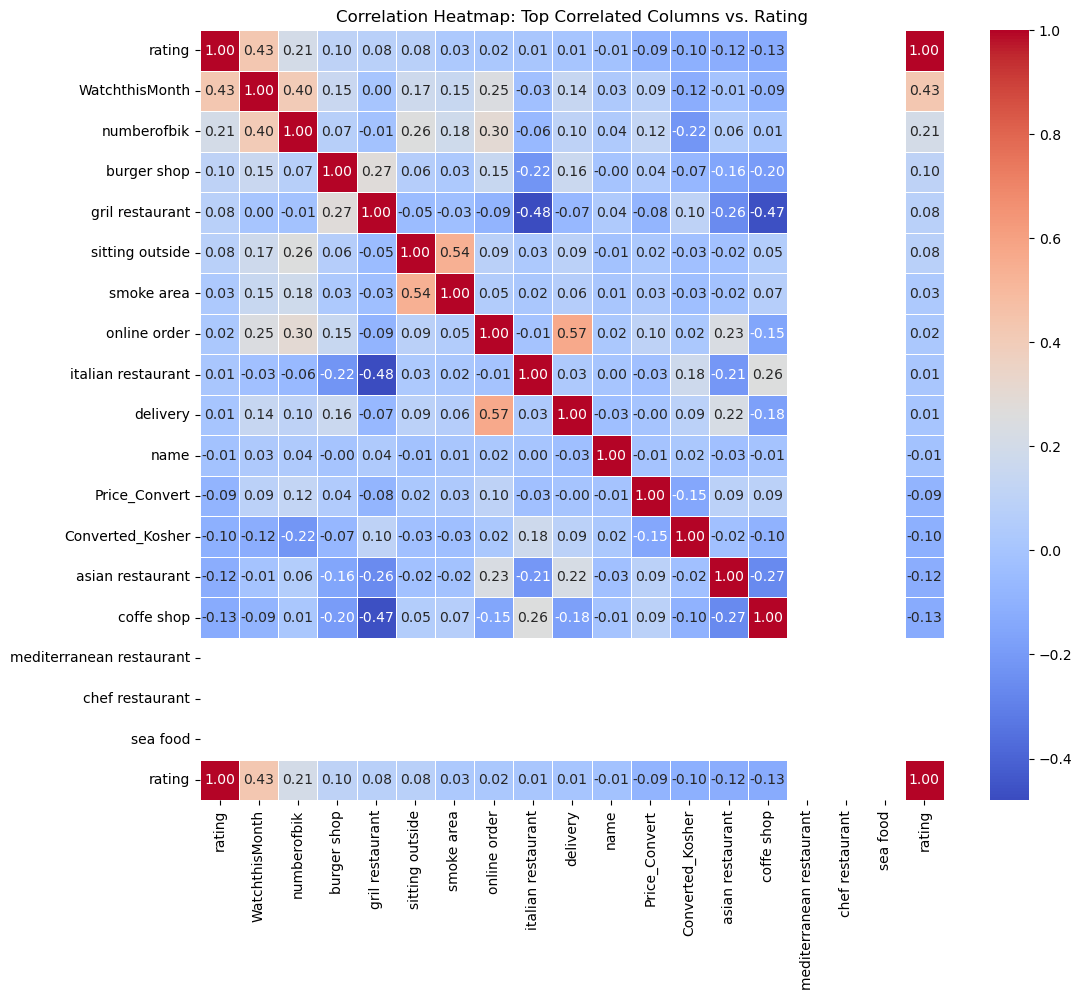

In [4]:

correlation_matrix = df.corr()

rating_correlations = correlation_matrix['rating']

sorted_correlations = rating_correlations.sort_values(ascending=False)

top_columns = sorted_correlations.index.tolist()

top_corr_df = df[top_columns + ['rating']]

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Top Correlated Columns vs. Rating')
plt.show()


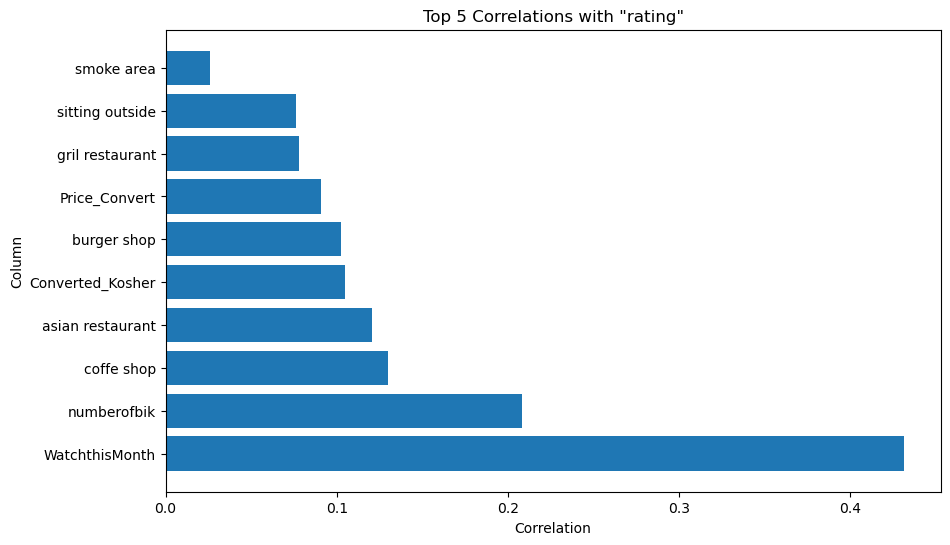

In [5]:


correlation_matrix = df.corr()

rating_correlations = correlation_matrix['rating']

rating_correlations = rating_correlations.drop('rating')

top_correlations = rating_correlations.abs().nlargest(10)

top_columns = top_correlations.index.tolist()
correlation_values = top_correlations.values

plt.figure(figsize=(10, 6))
plt.barh(top_columns, correlation_values)
plt.xlabel('Correlation')
plt.ylabel('Column')
plt.title('Top 10 Correlations with "rating"')
plt.show()


In [6]:
##Machine Learning using linear regression
X = df[['numberofbik','WatchthisMonth','asian restaurant','italian restaurant','gril restaurant','mediterranean restaurant','chef restaurant', 'sitting outside','smoke area','sea food','coffe shop','delivery','burger shop','online order','Converted_Kosher','Price_Convert']]
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("R^2 score:", score)
## making simple dataframe of midean values


R^2 score: 0.2148962460668653


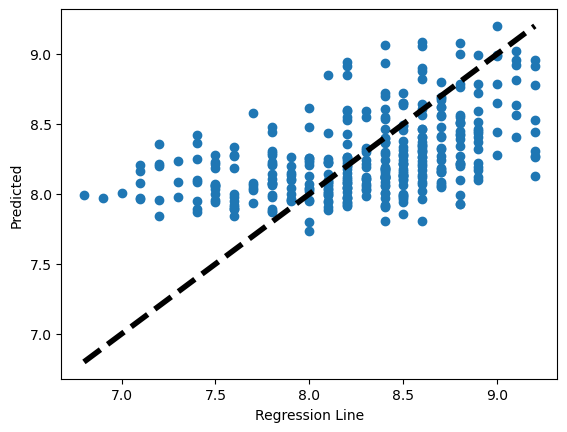

In [7]:

y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Regression Line')
ax.set_ylabel('Predicted')
plt.show()

In [8]:

correlation_coefficients = np.corrcoef(df.values.T)[:-1, -1]
correlation_df = pd.DataFrame({'Column': df.columns[:-1], 'Correlation': correlation_coefficients})
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

print(correlation_df)


                      Column  Correlation
2                numberofbik     0.121834
15              online order     0.102295
12                coffe shop     0.091166
4           asian restaurant     0.090762
3             WatchthisMonth     0.088051
14               burger shop     0.043621
10                smoke area     0.033837
9            sitting outside     0.022767
13                  delivery    -0.004266
0                       name    -0.008677
5         italian restaurant    -0.028376
6            gril restaurant    -0.083864
1                     rating    -0.091027
16          Converted_Kosher    -0.149859
7   mediterranean restaurant          NaN
8            chef restaurant          NaN
11                  sea food          NaN


C:\Users\Dima9\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Dima9\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [9]:

columns_to_keep = ["WatchthisMonth", "numberofbik", "coffe shop","asian restaurant", "Converted_Kosher", "rating"]

df_copy = df[columns_to_keep]


display(df_copy)

      WatchthisMonth  numberofbik  coffe shop  asian restaurant  \
0               1323         1467           0                 0   
1                284         4857           0                 0   
2                200          495           0                 0   
3                210          746           1                 0   
4                417         4301           0                 1   
...              ...          ...         ...               ...   
1807             366            6           0                 0   
1808             389          600           0                 0   
1809             229           76           0                 0   
1810             358            8           0                 0   
1811             750          151           0                 0   

      Converted_Kosher  rating  
0                    0     8.6  
1                    1     8.2  
2                    1     7.8  
3                    1     7.5  
4                    0     7.8

In [10]:

X = df[["WatchthisMonth", "numberofbik", "coffe shop","asian restaurant", "Converted_Kosher"]]
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("R^2 score:", score)


R^2 score: 0.19542911438014976


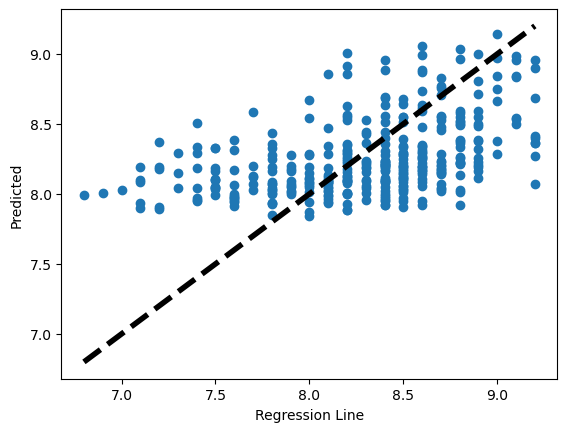

In [11]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Regression Line')
ax.set_ylabel('Predicted')
plt.show()

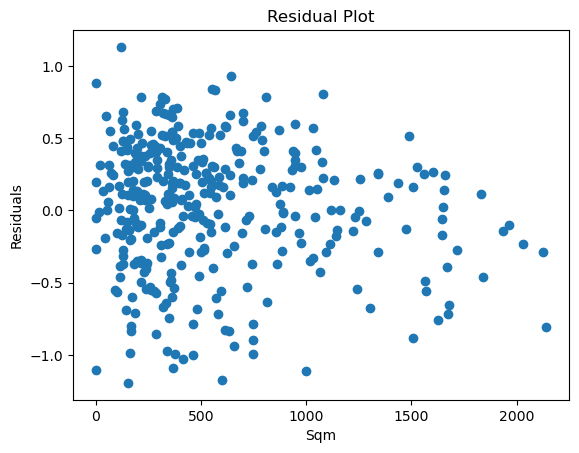

In [12]:
## Check the model by residual plot which shows residual betweeen predicted and actual values
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.scatter(X_test["WatchthisMonth"], residuals)
plt.title("Residual Plot")
plt.xlabel("Sqm")
plt.ylabel("Residuals")
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly_features.fit_transform(df[["WatchthisMonth", "numberofbik", "coffe shop"]])
poly_df = pd.DataFrame(poly_data, columns=poly_features.get_feature_names(["WatchthisMonth", "numberofbik", "coffe shop"]))


C:\Users\Dima9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
df["interaction"] = df["asian restaurant"] * df["coffe shop"]


In [20]:


df["log_numberofbik"] = np.log1p(df["numberofbik"])


In [21]:
df["WatchthisMonth_bins"] = pd.cut(df["WatchthisMonth"], bins=3, labels=["Low", "Medium", "High"])


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# Evaluate the model on the testing data
score = model.score(X_test, y_test)
print("R^2 score:", score)


R^2 score: 0.19542911438014976


In [24]:
display(df)

,name,rating,numberofbik,WatchthisMonth,asian restaurant,italian restaurant,gril restaurant,mediterranean restaurant,chef restaurant,sitting outside,...,sea food,coffe shop,delivery,burger shop,online order,Converted_Kosher,Price_Convert,interaction,log_numberofbik,WatchthisMonth_bins
0,1,8.6,1467,1323,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,7.291656,Medium
1,2,8.2,4857,284,0,0,1,0,0,1,...,0,0,1,0,1,1,1,0,8.488382,Low
2,3,7.8,495,200,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,6.206576,Low
3,4,7.5,746,210,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,6.616065,Low
4,5,7.8,4301,417,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,8.366835,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,2279,7.1,6,366,0,0,1,0,0,1,...,0,0,1,1,0,1,1,0,1.945910,Low
1808,2280,8.7,600,389,0,0,1,0,0,1,...,0,0,1,0,1,1,0,0,6.398595,Low
1809,2281,7.4,76,229,0,0,1,0,0,0,...,0,0,1,0,1,1,1,0,4.343805,Low
1810,2283,8.3,8,358,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,2.197225,Low
